 [Cropdata](CropData.csv)


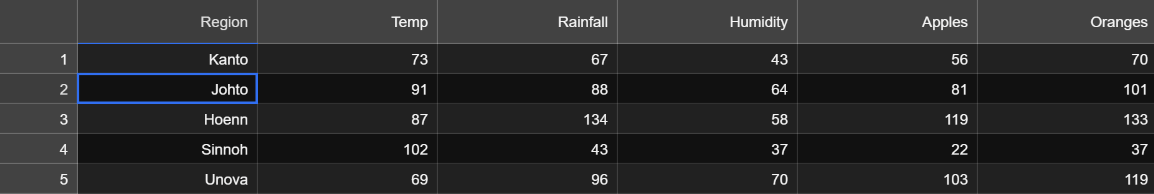

orangle_yield = w11 * temp + w12  * rainfall + w13 * humidity + b1 <br>
apple  _yield = w21 * temp + w22  * rainfall + w23 * humidity + b2


In [86]:
import numpy as np
import  torch
from numpy import genfromtxt

In [87]:
csvdata = genfromtxt('Cropdata.csv',delimiter = ',',dtype = 'float32')        
csvdata

array([[ nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  73.,  67.,  43.,  56.,  70.],
       [ nan,  91.,  88.,  64.,  81., 101.],
       [ nan,  87., 134.,  58., 119., 133.],
       [ nan, 102.,  43.,  37.,  22.,  37.],
       [ nan,  69.,  96.,  70., 103., 119.],
       [ nan,  74.,  66.,  43.,  57.,  69.],
       [ nan,  91.,  87.,  65.,  80., 102.],
       [ nan,  88., 134.,  59., 118., 132.],
       [ nan, 101.,  44.,  37.,  21.,  38.],
       [ nan,  68.,  96.,  71., 104., 118.],
       [ nan,  73.,  66.,  44.,  57.,  69.],
       [ nan,  92.,  87.,  64.,  82., 100.],
       [ nan,  87., 135.,  57., 118., 134.],
       [ nan, 103.,  43.,  36.,  20.,  38.],
       [ nan,  68.,  97.,  70., 102., 120.]], dtype=float32)

In [88]:
inputs = csvdata[1:6,1:4]
inputs , inputs.dtype



(array([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]], dtype=float32),
 dtype('float32'))

In [89]:
targets = csvdata[1:6,4:6]
targets , targets.dtype


(array([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]], dtype=float32),
 dtype('float32'))

In [90]:
inputs = torch.from_numpy(inputs)
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [91]:
targets = torch.from_numpy(targets)
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

### So  the model will be input * weights + Bias 

### orangle_yield = w11 * temp + w12 * rainfall + w13 * humidity + b1
### apple _yield = w21 * temp + w22 * rainfall + w23 * humidity + b2

You can see b1 and b2 is an addition and weights are the multiplication 


In [92]:
w = torch.randn(2,3,requires_grad = True)
w

tensor([[ 1.4423,  0.1183,  0.1217],
        [ 0.1091, -0.1046, -0.0180]], requires_grad=True)

In [93]:
b = torch.randn(2,requires_grad = True)
b

tensor([ 1.1344, -0.9202], requires_grad=True)

<h1> Model

### We Need to define the model which is X * W(T) + b 

In [94]:
"""this will be errpr"""
""" inputs @ w"""

' inputs @ w'

In [95]:
def model(input):
    return input @ w.t() + b


This is the prediction of the model 

In [96]:
prediction = model(inputs)
prediction

tensor([[119.5846,  -0.7293],
        [150.5869,  -1.3371],
        [149.5291,  -6.4753],
        [157.8430,   5.0529],
        [120.5322,  -4.6825]], grad_fn=<AddBackward0>)

### prediction[0][0] is the w11 * temp + w12 * rainfall + w13 * humidity + b1 for apples  
### prediction[0][1] is the w11 * temp + w12 * rainfall + w13 * humidity + b1 for oranges 

In [97]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

targets are way off , because the weights are random , now we need to find the lost and change the weights in a way the loss is reduced.

<h1> Loss Function

In [98]:
diff = prediction - targets
diffsq = diff * diff #to remove the negative
loss = torch.sum(diffsq) / diff.numel()
loss

tensor(7982.4912, grad_fn=<DivBackward0>)

In [99]:
def mse(t1 , t2) :
    diff = t1-t2
    return torch.sum(diff*diff) / diff.numel()


In [100]:
loss = mse(prediction,targets)
loss

tensor(7982.4912, grad_fn=<DivBackward0>)

In [101]:
loss.backward() ### this will create the gradient

In [102]:
print(w)
print(w.grad)

tensor([[ 1.4423,  0.1183,  0.1217],
        [ 0.1091, -0.1046, -0.0180]], requires_grad=True)
tensor([[ 5739.1650,  4399.8115,  3042.3669],
        [-7680.5938, -9136.2939, -5504.0640]])


In [103]:
print(b)
print(b.grad)

tensor([ 1.1344, -0.9202], requires_grad=True)
tensor([ 63.4152, -93.6343])


In [104]:
loss = mse(prediction,targets)
loss

tensor(7982.4912, grad_fn=<DivBackward0>)

<h1> Gradient Descent</h1>

In [105]:
w.grad

tensor([[ 5739.1650,  4399.8115,  3042.3669],
        [-7680.5938, -9136.2939, -5504.0640]])

In [106]:
with torch.no_grad():
    w -= w.grad * 0.00005
    b -= b.grad * 0.00005
    

In [107]:
print(w.grad)
print(b.grad)
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[ 5739.1650,  4399.8115,  3042.3669],
        [-7680.5938, -9136.2939, -5504.0640]])
tensor([ 63.4152, -93.6343])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [108]:
prediction = model(inputs)
loss = mse(prediction,targets)
loss

tensor(1472.1418, grad_fn=<DivBackward0>)

<h1> Training

In [109]:
def training(epoc , inputs,targets , weights,bias,learning_rate) :
    for i in range(epoc):
        prediction = model(inputs)
        loss = mse(prediction , targets)
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * learning_rate
            bias -= bias.grad * learning_rate
            weights.grad.zero_()
            bias.grad.zero_()
            
            

In [134]:
training(100,inputs,targets,w,b,0.00001)

In [135]:
prediction = model(inputs)
loss = mse(prediction , targets)
loss     

tensor(3.7791, grad_fn=<DivBackward0>)

In [112]:
prediction

tensor([[ 65.5658,  74.5030],
        [ 84.0559,  99.9737],
        [100.9861, 127.7971],
        [ 68.4266,  61.9274],
        [ 77.7304, 103.2076]], grad_fn=<AddBackward0>)